In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
x = data.drop('target', axis=1)
y = data['target']

In [6]:
x.shape

(1025, 13)

In [7]:
y.value_counts()

,count
target,
1,526
0,499


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [10]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [11]:
y_train

,target
835,0
137,1
534,1
495,1
244,1
...,...
700,1
71,0
106,0
270,1


In [12]:
y_test

,target
527,1
359,1
447,0
31,1
621,0
...,...
832,1
796,1
644,1
404,0


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

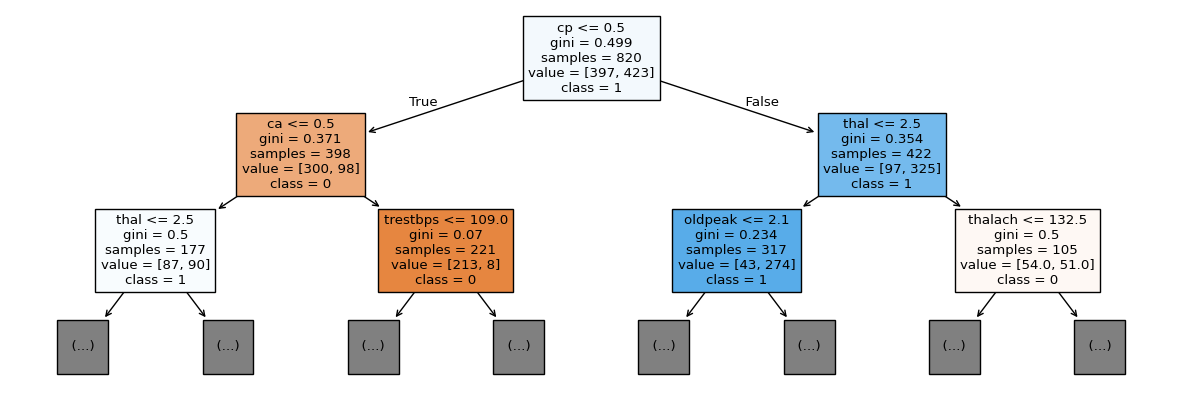

In [16]:
plt.figure(figsize=(15,5))
plot_tree(dt,filled=True,feature_names=data.columns[:-1],class_names=[str(c) for c in y_train.unique()],max_depth=2)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,dt.predict(x_train))
test_acc=accuracy_score(y_test,dt.predict(x_test))
print(train_acc,test_acc)


1.0 0.9853658536585366


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
rf_acc=accuracy_score(y_test,rf.predict(x_test))
rf_acc

0.9853658536585366

In [25]:
importances = pd.Series(rf.feature_importances_, index=data.columns[:-1])
importances.sort_values(ascending=False).head()

,0
cp,0.135072
ca,0.127327
thalach,0.122169
oldpeak,0.121905
thal,0.110518


In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,x,y,cv=5)
scores

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [27]:
scores.mean()

np.float64(0.9970731707317073)